# Test for VOC2012 trainval

In [1]:
import sys
sys.path.append('../')

from data import datasets
from data import transforms, target_transforms, augmentations, utils

from ssd.models.ssd300 import SSD300

from torch.utils.data import DataLoader
%matplotlib notebook
import matplotlib.pyplot as plt

# Load model trained VOC2007

In [2]:
augmentation = None

transform = transforms.Compose(
    [transforms.Resize((300, 300)),
     transforms.ToTensor(),
     transforms.Normalize(rgb_means=(0.485, 0.456, 0.406), rgb_stds=(0.229, 0.224, 0.225))]
)
target_transform = target_transforms.Compose(
    [target_transforms.ToCentroids(),
     target_transforms.OneHot(class_nums=datasets.VOC_class_nums, add_background=True),
     target_transforms.ToTensor()]
)
test_dataset = datasets.Compose(datasets=(datasets.VOC2012_TrainValDataset,),
                                transform=transform, target_transform=target_transform, augmentation=augmentation)

test_loader = DataLoader(test_dataset,
                          batch_size=32,
                          shuffle=False,
                          num_workers=4,
                          collate_fn=utils.batch_ind_fn)

<IPython.core.display.Javascript object>


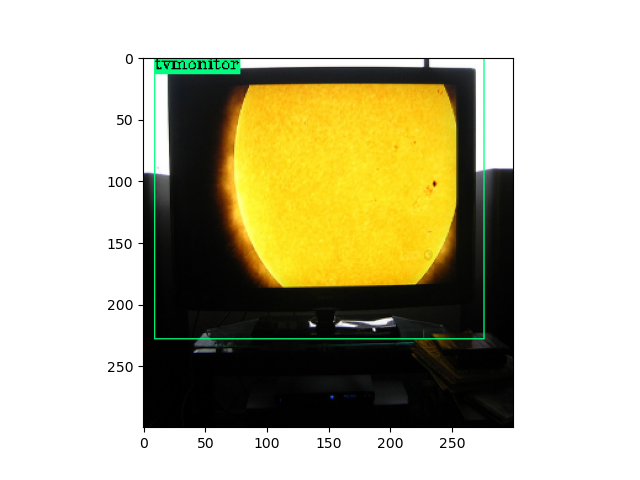

<IPython.core.display.Javascript object>


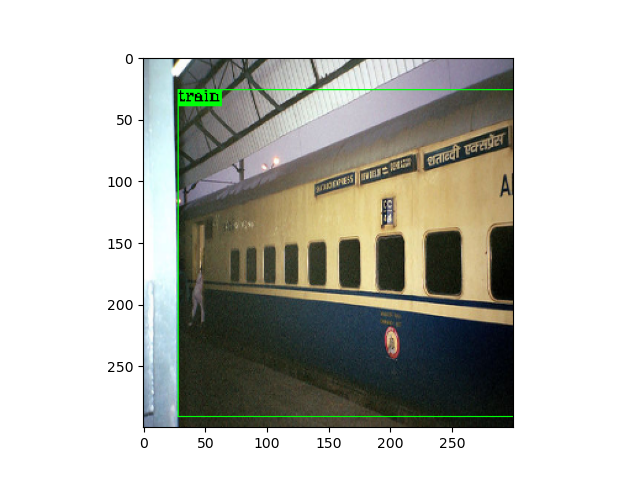

<IPython.core.display.Javascript object>


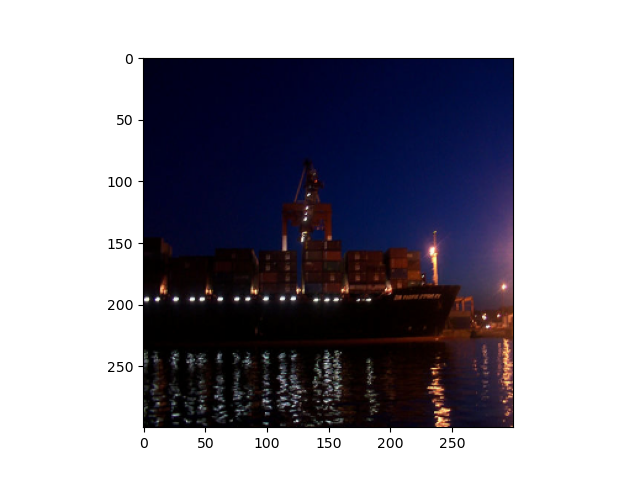

<IPython.core.display.Javascript object>


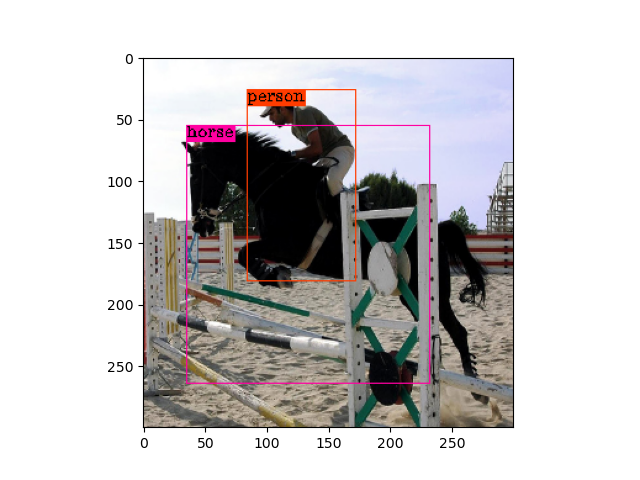

<IPython.core.display.Javascript object>


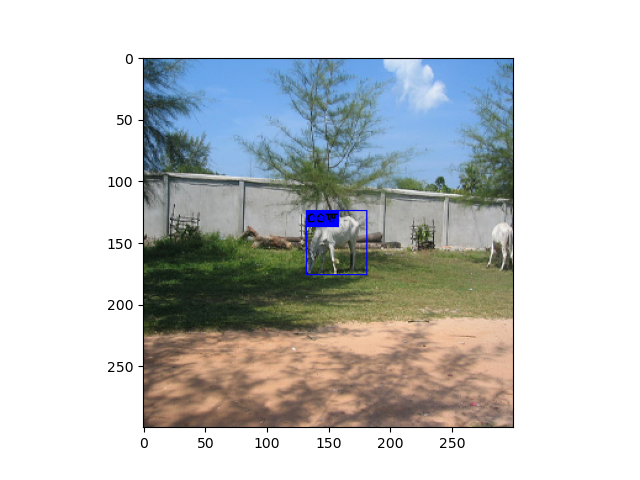

<IPython.core.display.Javascript object>


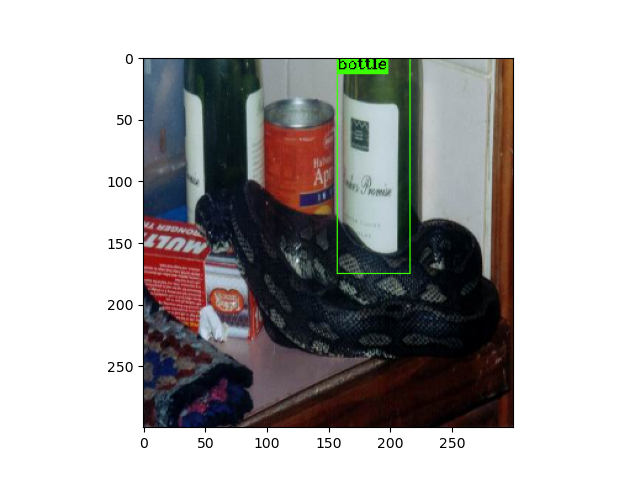

<IPython.core.display.Javascript object>


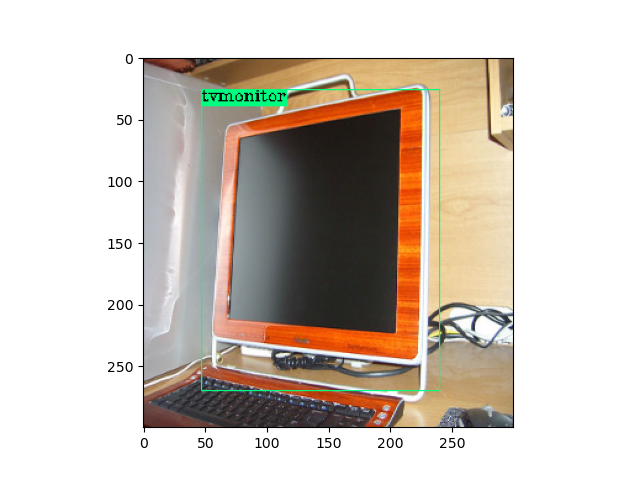

<IPython.core.display.Javascript object>


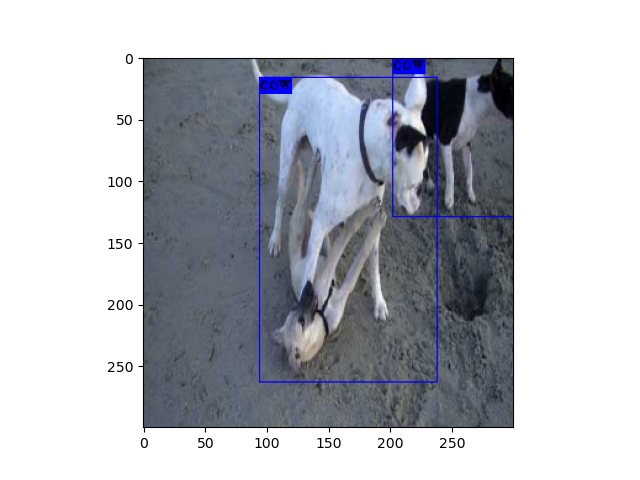

<IPython.core.display.Javascript object>


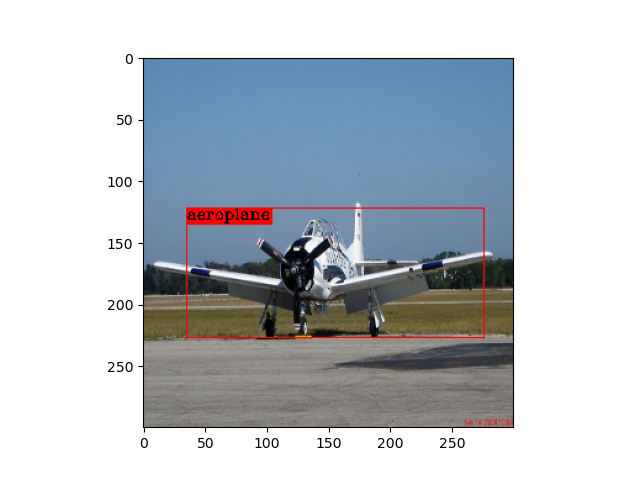

<IPython.core.display.Javascript object>


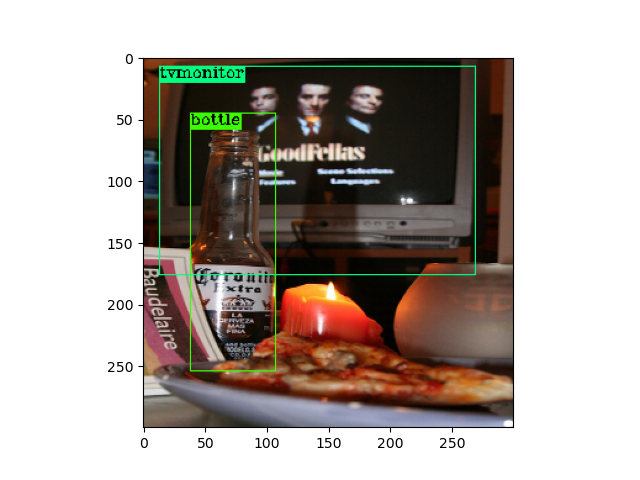

<IPython.core.display.Javascript object>


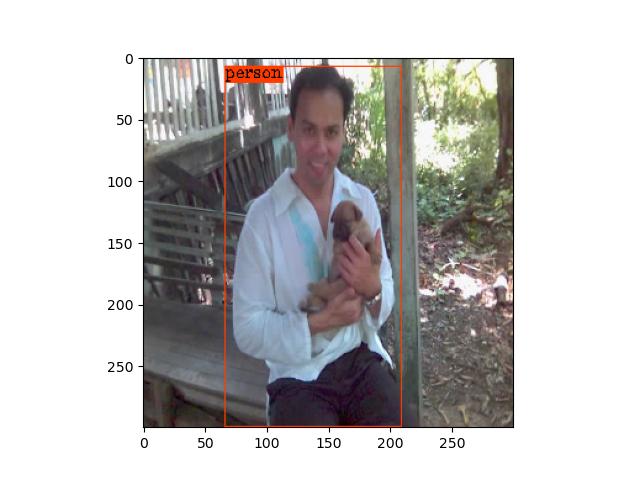

<IPython.core.display.Javascript object>


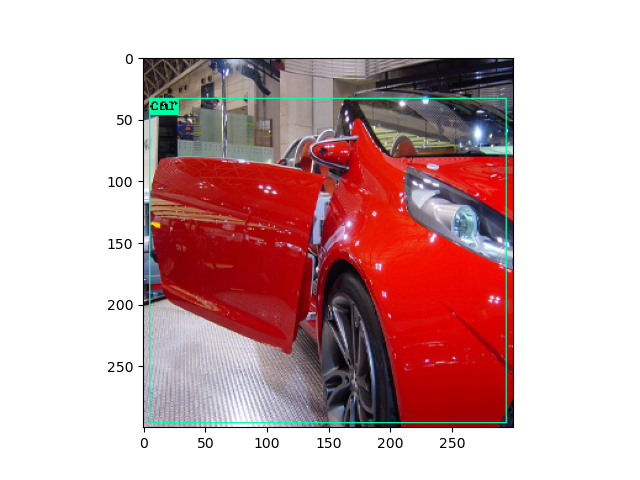

<IPython.core.display.Javascript object>


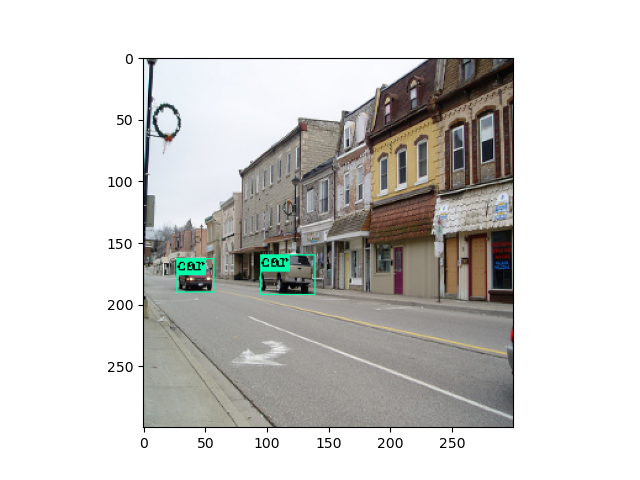

<IPython.core.display.Javascript object>


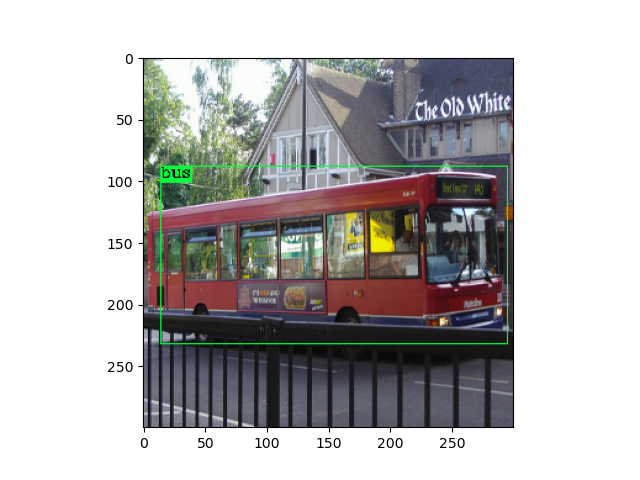

<IPython.core.display.Javascript object>


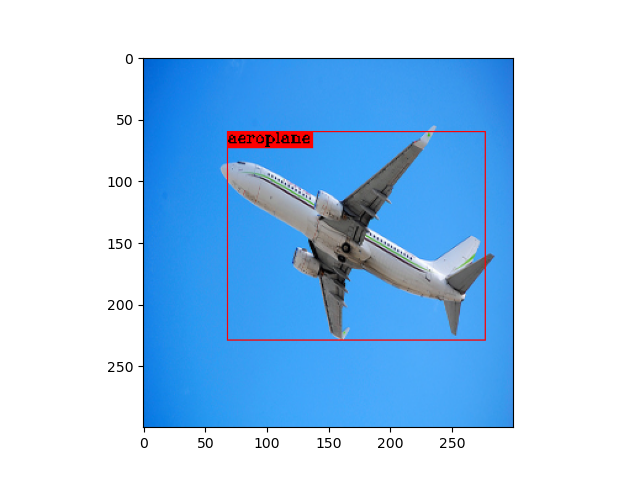

<IPython.core.display.Javascript object>


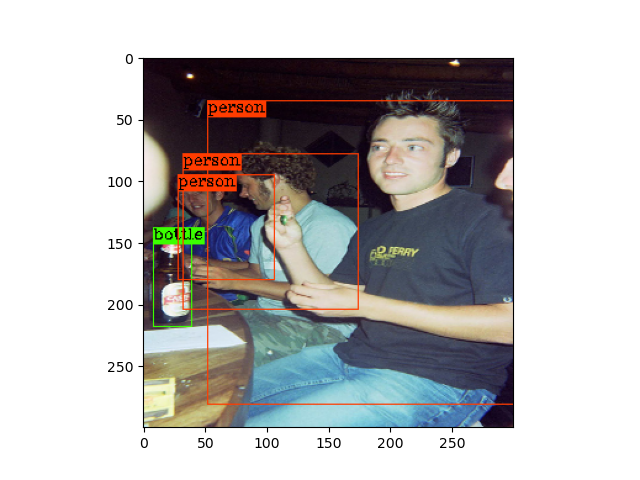

<IPython.core.display.Javascript object>


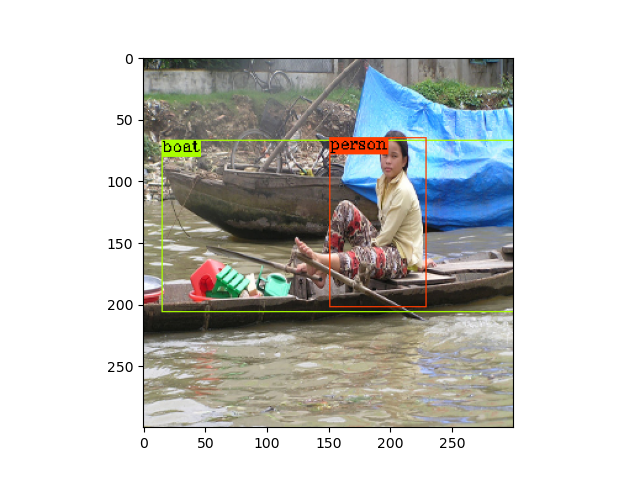

<IPython.core.display.Javascript object>


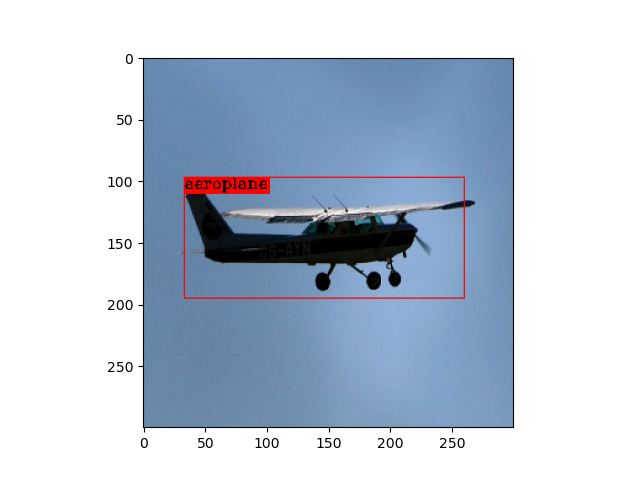

<IPython.core.display.Javascript object>


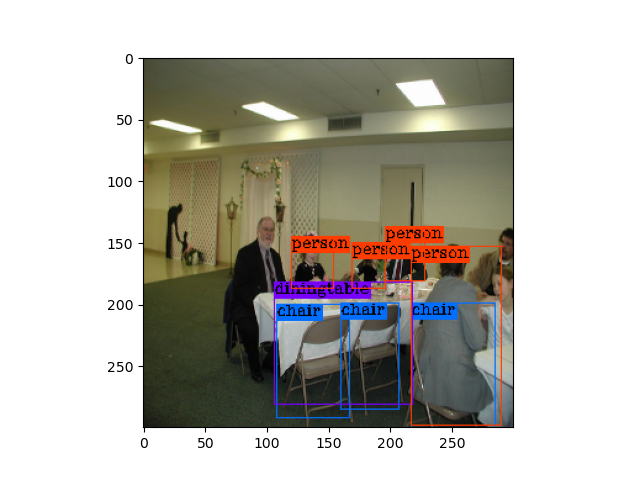

<IPython.core.display.Javascript object>


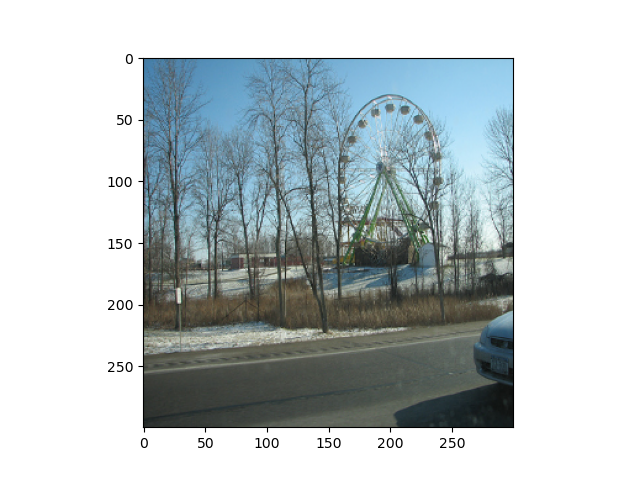

In [3]:
model = SSD300(class_labels=test_dataset.class_labels, batch_norm=False).cuda()
model.load_weights('../weights/ssd300-voc2007/ssd300-voc2007_i-60000.pth')
model.eval()

images = [test_dataset[i][0] for i in range(20)]
inf, ret_imgs = model.infer(images, visualize=True)

for img in ret_imgs:
    plt.figure()
    plt.imshow(img)